## TensorFlow - MNIST

In this notebook we will use **TensorFlow** to make predictions on **MNIST** dataset.

In [2]:
#Imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Get MNIST dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [6]:
#Lets build a simple model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2977 - accuracy: 0.9121 - val_loss: 0.1393 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1411 - accuracy: 0.9582 - val_loss: 0.0981 - val_accuracy: 0.9695
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1078 - accuracy: 0.9668 - val_loss: 0.0869 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0867 - accuracy: 0.9738 - val_loss: 0.0745 - val_accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0748 - accuracy: 0.9764 - val_loss: 0.0776 - val_accuracy: 0.9750
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9783 - val_loss: 0.0705 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0568 - accuracy: 0.9812 - val_loss: 0.0705 - val_accuracy:

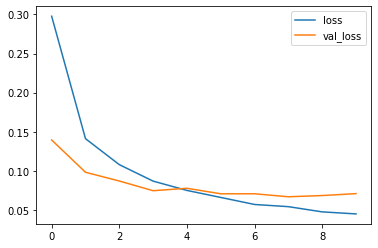

In [8]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

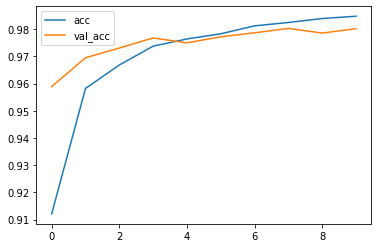

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [10]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9802
[0.07073193043470383, 0.9801999926567078]


In [15]:
#lets look at the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 973,    0,    0,    2,    0,    0,    1,    1,    3,    0],
       [   0, 1125,    3,    1,    0,    1,    2,    1,    2,    0],
       [   2,    2, 1007,    2,    1,    0,    2,    9,    7,    0],
       [   0,    0,    7,  994,    0,    1,    0,    3,    3,    2],
       [   1,    0,    2,    0,  955,    0,    6,    4,    1,   13],
       [   2,    0,    0,   14,    0,  864,    4,    2,    6,    0],
       [   5,    2,    1,    1,    1,    3,  944,    0,    1,    0],
       [   2,    3,    6,    2,    0,    0,    0, 1008,    4,    3],
       [   6,    1,    2,    5,    3,    2,    1,    3,  950,    1],
       [   1,    2,    0,    5,    4,    2,    0,    7,    6,  982]])

In [21]:
#Lets look at some missclassified images
missclassified_ndx = np.where(y_pred != y_test)[0][0:5]
missclassified_ndx

array([ 18, 151, 247, 259, 274])

In [22]:
y_pred[missclassified_ndx]

array([8, 8, 6, 0, 3])

In [23]:
y_test[missclassified_ndx]

array([3, 9, 4, 6, 9], dtype=uint8)

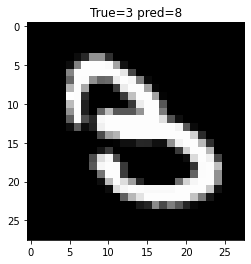

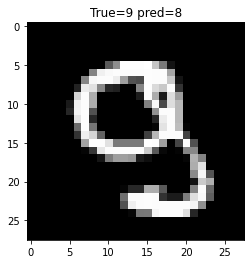

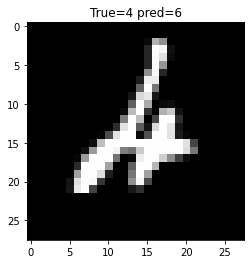

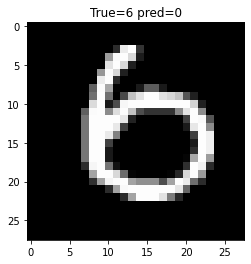

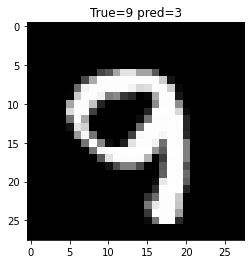

In [26]:
for i in missclassified_ndx:
  plt.figure()
  plt.imshow(x_test[i], cmap='gray')
  plt.title(f'True={y_test[i]} pred={y_pred[i]}')

We can see many of these are very confusing.